### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

RANDOM_SEED = 7124
LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


In [2]:
# Reading the data and lookng at the structure of the data. This data has 30 attributes and 1 lakh records

data = pd.read_csv("data/fraud_data_amtstd.csv")

data.shape

(100000, 30)

In [3]:
#Looking at a sample of records

data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.836500,-0.545419,-0.462979,0.537174,-0.426143,-0.100606,-0.584764,-0.103956,2.268429,-0.365185,...,0.085111,0.410736,0.137625,0.602906,-0.350260,0.464407,-0.070917,-0.030486,0.049882,0
1,-4.289880,-2.576061,-0.092256,1.976405,2.810033,-2.669128,-0.981883,-0.470310,-0.025692,0.099528,...,-0.473240,-0.307295,-2.789549,0.578976,-0.837979,0.372843,0.353451,-1.662202,-0.347171,0
2,1.131318,0.139818,0.586921,1.069291,-0.334908,-0.204938,-0.135526,0.043821,-0.121117,0.182139,...,-0.028126,-0.167062,-0.048054,-0.009912,0.417694,-0.479793,0.024360,0.023878,-0.208963,0
3,-0.866956,1.373947,1.948343,2.686750,-0.366790,0.568632,-0.278349,0.739536,-1.655955,0.708396,...,0.022719,-0.070619,-0.080307,0.000816,0.092167,0.159131,0.157940,-0.014370,-0.253595,0
4,-0.842670,1.401843,0.927235,1.070402,0.843883,0.467333,0.366716,0.616739,-1.586963,0.000041,...,0.036573,-0.182581,-0.226834,-1.029794,-0.118762,-0.228960,-0.024250,0.046547,-0.346230,0
5,1.178458,0.166055,-0.101567,0.369453,0.017198,-0.722891,0.396639,-0.187978,-0.483147,0.083094,...,-0.323048,-1.083814,0.049838,-0.002872,0.295810,0.135883,-0.074191,0.004364,-0.150527,0
6,1.869017,-0.202287,-0.218739,1.496434,-0.403332,-0.013593,-0.342586,0.129402,0.911017,0.149568,...,-0.458963,-1.058509,0.439679,-0.066668,-0.376792,-1.125226,0.053537,-0.039380,-0.305050,0
7,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,-0.535903,...,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,-0.347171,0
8,1.787763,-0.737892,-0.185794,0.362758,-0.550775,0.676564,-0.932369,0.390445,1.349983,-0.136095,...,0.331025,1.223539,0.264791,-0.541170,-0.571339,0.812785,0.017984,-0.054691,-0.232691,0
9,-1.055540,0.942471,0.986697,1.560551,-0.138755,-0.253645,0.622974,-0.321826,-0.215914,0.816454,...,0.153985,0.985031,0.204281,0.455561,-0.456576,-0.244140,-0.833487,-0.419773,-0.173549,0


0    99508
1      492
Name: Class, dtype: int64


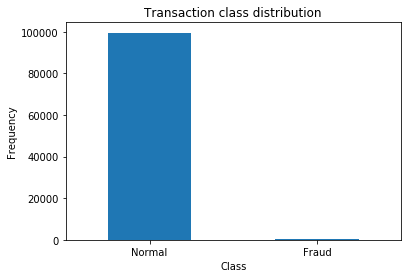

In [230]:
#Plotting the frequencies of fraud and non-fraud transactions in the data

count_classes = pd.value_counts(data['Class'], sort = True)

print(count_classes)

#Drawing a barplot

count_classes.plot(kind = 'bar', rot=0)

#Giving titles and labels to the plot

plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [231]:
from sklearn.model_selection import train_test_split

# Converting data to array

data = np.array(data)

In [232]:
# Splitting the data into train and test and observing their dimensions

X_train_init, X_test_init = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED,
                                  stratify = data[:, -1])

print(X_train.shape)
print(X_test.shape)

(80000, 30)
(16315, 29)


In [233]:
# Obtaining the fraud and non-fraud records in train

print(np.unique(X_train_init[:,29],return_counts=True))

print(np.unique(X_test_init[:,29],return_counts=True))

(array([0., 1.]), array([79606,   394]))
(array([0., 1.]), array([19902,    98]))


In [234]:
# Now consider only the non-fraud records for training
X_train_NF_init = X_train_init[X_train_init[:,-1] == 0]

X_train_NF = X_train_NF_init[:,:-1]

print(X_train_NF.shape)

(79606, 29)


In [235]:
# Separating out the fraud records from the train 

X_train_F = X_train_init[X_train_init[:,-1] == 1]

print(X_train_F.shape)

(394, 30)


In [236]:
#Adding/concatenating the fraud records from train data to the test

X_test_full = np.concatenate((X_test_init, X_train_F), axis=0)

print(X_test_full.shape)

X_test, X_eval = train_test_split(X_test_full, test_size=0.2, random_state=RANDOM_SEED,
                                 stratify = X_test_full[:,-1])

y_test = X_test[:,-1]

X_test = X_test[:,:-1]

y_test = np.expand_dims(y_test, axis=1)

y_test.shape

(20394, 30)


(16315, 1)

In [237]:
print(X_test.shape)
print(X_eval.shape)

(16315, 29)
(4079, 30)


## Model Building

In [238]:
input_dim = X_train_NF.shape[1]

encoding_dim = 15

In [239]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='linear'))

In [240]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [241]:
hist = autoencoder.fit(X_train_NF, X_train_NF, epochs=10,
                        batch_size=batch_size, shuffle=True,
                        validation_split=0.3, verbose=1)

Train on 55724 samples, validate on 23882 samples
Epoch 1/10
55724/55724 [==============================] - 3s 56us/step - loss: 0.7256 - mse: 0.7256 - val_loss: 0.3791 - val_mse: 0.3791
Epoch 2/10
55724/55724 [==============================] - 3s 56us/step - loss: 0.4098 - mse: 0.4098 - val_loss: 0.2650 - val_mse: 0.2650
Epoch 3/10
55724/55724 [==============================] - 3s 53us/step - loss: 0.3681 - mse: 0.3681 - val_loss: 0.2464 - val_mse: 0.2464
Epoch 4/10
55724/55724 [==============================] - 3s 56us/step - loss: 0.3586 - mse: 0.3586 - val_loss: 0.2420 - val_mse: 0.2420
Epoch 5/10
55724/55724 [==============================] - 3s 50us/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 6/10
55724/55724 [==============================] - 3s 50us/step - loss: 0.3545 - mse: 0.3545 - val_loss: 0.2374 - val_mse: 0.2374
Epoch 7/10
55724/55724 [==============================] - 3s 49us/step - loss: 0.3482 - mse: 0.3482 - val_loss: 0.2382 - val_mse

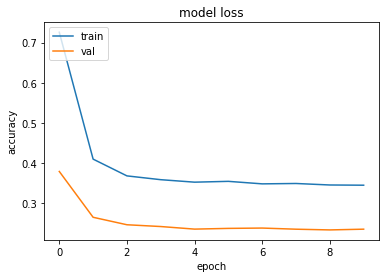

In [242]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [202]:
## Making predictions on the train data

predictions = autoencoder.predict(X_train_NF)


In [203]:
##We want to separate out fraud records and non-fraud records for later use

f = np.hstack((X_test, y_test))
print(f.shape)

test_nf = f[f[:,29] == 0]
print(test_nf.shape)

test_f = f[f[:,29] == 1]
print(test_f.shape)

(16315, 30)
(15921, 30)
(394, 30)


In [204]:
#Getting the errors from the non fraud data separately 
autoencoder.evaluate(test_nf[:,:29], test_nf[:,:29])

15921/15921 [==============================] - ETA:  - 0s 16us/step


[0.2149593788253236, 0.21495941281318665]

In [205]:
#Getting the errors from the fraud data separately
autoencoder.evaluate(test_f[:,:29],test_f[:,:29])

394/394 [==============================] - 0s 33us/step


[20.175164847204528, 20.17516326904297]

In [206]:
#Obtaining predictions for non fraud records
predictions_nf = autoencoder.predict(test_nf[:,:29])

#Obtaining predictions for fraud records
predictions_f = autoencoder.predict(test_f[:,:29])

In [207]:
#Identifying the error computation method by autoencoder(Mean Squared Error). The computation is as follows 
np.mean(np.square(np.abs(test_nf[:,:29] - predictions_nf)))

0.21495937866805184

In [208]:
#Computing errors on the non-fraud data
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)), axis=1)

errors_nf[0:5]

array([0.37548382, 0.17273047, 0.36375033, 0.19704492, 0.17505752])

In [209]:
#Computing errors on the fraud data
errors_f = np.mean(np.square(np.abs(test_f[:,:29] - predictions_f)), axis=1)

errors_f[0:5]

array([11.32507154,  0.14750237,  0.17443772,  2.7197544 ,  8.37892231])

In [210]:
#Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.014287173867647319
48.79180118948004
0.12784882622932994
0.05383298970243545
105.75846521956943
8.011942179841833


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb1100420b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0f8599dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb11010df60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb10eaee080>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1105c94a8>],
 'means': []}

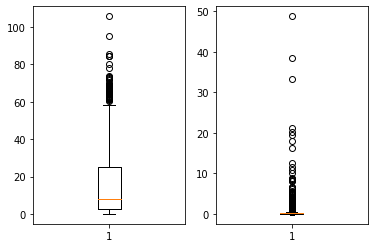

In [211]:
#PLotting the error box plots 

plt.subplot(1, 2, 1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

In [212]:
#Experimentation to fix a threshold for classification of a transaction into fraud or non-fraud
print(sum(errors_nf > np.median(errors_f)))

print(sum(errors_f < np.median(errors_f)))

print(sum(errors_f < np.median(errors_nf)))

sum(errors_nf > np.median(errors_nf))

18
197
14


7960

In [213]:
print(errors_nf.shape)

print(errors_f.shape)

(15921,)
(394,)


In [214]:
print(predictions_nf.shape)

print(predictions_f.shape)

(15921, 29)
(394, 29)


In [216]:
test_pred = autoencoder.predict(X_test[:,:29])
test_recon  = (((test_pred-X_test)**2).mean(-1))

train_pred = autoencoder.predict(X_train_NF[:,:29])
mean_recon = (((train_pred - X_train_NF)**2).mean(-1).mean())

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

scores_f1 = []
thres = []

th = 0

for i in range(100):
    
    th += 0.1
    
    fraud = (test_recon > mean_recon + th)
    
    scores_f1.append(f1_score(y_test,fraud))
    
    thres.append(th + mean_recon)
    

In [217]:
X_test.shape

(16315, 29)

2.7292406602613006


array([[15862,    59],
       [   94,   300]])

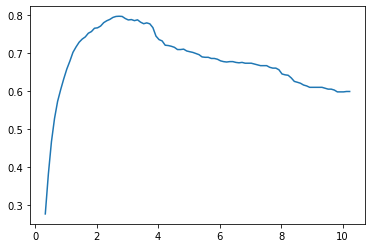

In [221]:
plt.plot(thres, scores_f1)

print(thres[np.array(scores_f1).argmax()])

threshold_fraud = thres[np.array(scores_f1).argmax()]

fraud = (test_recon > thres[np.array(scores_f1).argmax()])

confusion_matrix(y_test, fraud)

In [222]:
##Predicting on Valdation 

predictions_eval = autoencoder.predict(X_eval[:,:29])


In [223]:
errors_eval = np.square(np.subtract(predictions_eval, X_eval[:,:29]))

In [224]:
fraud_eval = (((errors_eval - X_eval[:,:29])**2).mean(-1)) > threshold_fraud

In [225]:
from sklearn.metrics import classification_report

In [226]:
print(classification_report(y_true = X_eval[:,29], y_pred=fraud_eval))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      3981
         1.0       0.24      0.94      0.39        98

   micro avg       0.93      0.93      0.93      4079
   macro avg       0.62      0.93      0.68      4079
weighted avg       0.98      0.93      0.95      4079

